In [174]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# For the stuckness summary by learner data 
# The current dataset being pulled is a subset who exhibited learning behavior 
# Out of the  total learners who worked on more than 1 exercise, 
# about 82% exhibited some signs of learning,
# where an exercise had both correct and incorrect responses. Out of the 18%  remaining sessions,  
# 15% mastered some exercises immediately and 12% never got unstuck out of some exercises. 
# Only 5% mastered all their exercises and 2% were stuck on all their exercises. 

stuck = pd.read_csv('~/cahl_output/summarize_stuckness_bylearner_problemtype.csv')


In [176]:
stuck['perc_unstuck'] = stuck['unstuck_problems']/(
    stuck['never_unstuck_problems'] + stuck['unstuck_problems'])

stuck.shape
stuck.head()

,sha_id,total_problems,never_stuck_problems,never_unstuck_problems,unstuck_problems,reattempted_stuck_problems,unstuck_different_exercise,unstuck_remediation_problems,unstuck_correct_remdiation_problems,unstuck_prereq_avail_problems,unstuck_is_prereq_match_problems,unstuck_is_topic_tree_avail_problems,unstuck_is_not_unit_match_problems,unstuck_is_not_lesson_match_problems,unstuck_topic_tree_avail_remediation_items,unstuck_unit_match_remediation_items,unstuck_lesson_match_remediation_items,perc_unstuck
0,sha_id,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,0001R22gGbvLqg5+mSbv7kpiOjFTLE7eddHYSfaqMA8=,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,0002PRyVGO/PD9Tj3S7W79JCi0otKMSfCI3RGFv0GJo=,8,4,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0.0
3,0005vOGB8+M9AXMwj/abTgxySeBzy2cazO6p1H8C/VM=,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,00068D7jsV0viktfuth2oNk8P8nSh04m70ODvozWAH0=,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [235]:
# Find stats for those who exhibited learning: i.e.,
# How many learners never get stuck
# How many learner 
# How many learners ever get stuck?



output_metrics = {
    '01-total learners ':{
            'total learners': stuck['sha_id'].count(),
            'total problems': '-'
            },
    '02-tried a problems':{
            'total learners': sum(stuck['total_problems']>0),
            'total problems': stuck['total_problems'].sum()
            },
    '03-immediately mastered a problem ':{
            'total learners': sum(stuck['never_stuck_problems']>0),
            'total problems': stuck['never_stuck_problems'].sum() 
            },
    '04-got stuck ever':{
            'total learners': sum((stuck['never_unstuck_problems']>0)|(stuck['unstuck_problems']>0)),
            'total problems': stuck['never_unstuck_problems'].sum() + stuck['unstuck_problems'].sum() 
            },
    '05-unable to unstuck':{
            'total learners': sum(stuck['never_unstuck_problems']>0),
            'total problems':  stuck['never_unstuck_problems'].sum()
            },
    '06-attempted to unstuck':{
            'total learners':sum(stuck['reattempted_stuck_problems']>0),
            'total problems': stuck['reattempted_stuck_problems'].sum()
            },    
    '07-able to unstuck':{
            'total learners':sum(stuck['unstuck_problems']>0),
            'total problems': stuck['unstuck_problems'].sum()
            },    
    '08-unstuck exercise have prereq available':{
            'total learners':sum(stuck['unstuck_prereq_avail_problems']>0),
            'total problems': stuck['unstuck_prereq_avail_problems'].sum()
            },   
    '09-prereq for unstuck exercise matches prereq':{
            'total learners':sum(stuck['unstuck_is_prereq_match_problems']>0),
            'total problems': stuck['unstuck_is_prereq_match_problems'].sum()
            },
    '10-unstuck remediation problems for unstuck exercise':{
            'total learners':sum(stuck['unstuck_remediation_problems']>0),
            'total problems': stuck['unstuck_remediation_problems'].sum()
            },      
    '11-unstuck remediation problems different exercise as stuck exercise':{
            'total learners':sum(stuck['unstuck_different_exercise']>0),
            'total problems': stuck['unstuck_different_exercise'].sum()
            },  
    '12-unstuck remediation problems answered correctly':{
            'total learners':sum(stuck['unstuck_correct_remdiation_problems']>0),
            'total problems': stuck['unstuck_correct_remdiation_problems'].sum()
            },    
    '13-unstuck remediation exericse in topic tree':{
            'total learners':sum(stuck['unstuck_is_topic_tree_avail_problems']>0),
            'total problems': stuck['unstuck_is_topic_tree_avail_problems'].sum()
            },    
    '14-unstuck remediation at least one not in same unit':{
            'total learners':sum(stuck['unstuck_is_not_unit_match_problems']>0),
            'total problems': stuck['unstuck_is_not_unit_match_problems'].sum()
            },    
    '15-unstuck remediation exercise at least one not in same lesson':{
            'total learners':sum(stuck['unstuck_is_not_lesson_match_problems']>0),
            'total problems': stuck['unstuck_is_not_lesson_match_problems'].sum()
            },
    '16-unstuck remediation problems for exercises in topic tree':{
            'total learners':sum(stuck['unstuck_topic_tree_avail_remediation_items']>0),
            'total problems': stuck['unstuck_topic_tree_avail_remediation_items'].sum()
            },    
    '17-unstuck remediation problems in same unit':{
            'total learners':sum(stuck['unstuck_unit_match_remediation_items']>0),
            'total problems': stuck['unstuck_unit_match_remediation_items'].sum()
            },    
    '18-unstuck remediation problems in same lesson':{
            'total learners':sum(stuck['unstuck_lesson_match_remediation_items']>0),
            'total problems': stuck['unstuck_lesson_match_remediation_items'].sum()
            }  
}

output = pd.DataFrame(columns = ['metric','total learners','total problems'])

for metric in sorted(output_metrics.keys()):
    output = output.append({'metric': metric,
                           'total learners': output_metrics[metric]['total learners'],
                           'total problems': output_metrics[metric]['total problems']},
                          ignore_index = True)

print('Summary of Metrics:')
print(output)
output.to_csv('summary_of_metrics.csv')
# stored here
# https://docs.google.com/spreadsheets/d/12qtEK-M36oz_ZLam6KveuWQniH6YYoZkOiqA17x3tqA/edit#gid=0

Summary of Metrics:
                                               metric total learners  \
0                                  01-total learners         5850161   
1                                 02-tried a problems        5726004   
2                  03-immediately mastered a problem         5162594   
3                                   04-got stuck ever        5039702   
4                                05-unable to unstuck        4530394   
5                             06-attempted to unstuck        4149680   
6                                  07-able to unstuck        3239288   
7           08-unstuck exercise have prereq available        3142876   
8       09-prereq for unstuck exercise matches prereq        1129282   
9   10-unstuck remediation problems for unstuck ex...        3062036   
10  11-unstuck remediation problems different exer...        1643564   
11  12-unstuck remediation problems answered corre...        2951934   
12      13-unstuck remediation exericse in t

In [239]:
# For those learners who are remediating, and getting unstuck, 
# what is the average number of remediation problems 

# average 60 remediation problems 
avg_unstuck_remediation = stuck['unstuck_remediation_problems'].sum()/stuck['unstuck_problems'].sum()
print('%d avg problems worked on to unstuck' % avg_unstuck_remediation)

# if they only try out the same exercise
# average 4 remediation problems 
avg_unstuck_remediation_same = stuck[stuck['unstuck_different_exercise']==0].unstuck_remediation_problems.sum()/stuck[
    stuck['unstuck_different_exercise']==0].unstuck_problems.sum()
print('%d avg problems worked on to unstuck if only work on same exercise' % avg_unstuck_remediation_same)
# if they only try out different exercise (any exercise)
# average 74 remediation problems 
avg_unstuck_remediation_diff = stuck[stuck['unstuck_different_exercise']>0].unstuck_remediation_problems.sum()/stuck[
    stuck['unstuck_different_exercise']>0].unstuck_problems.sum()
print('%d avg problems worked on to unstuck if ever work on different exercise' % avg_unstuck_remediation_diff)


# if they try out different exercise but stay in same lesson 
# average 10 remediation problems 
avg_unstuck_remediation_diff_exercise = stuck[stuck['unstuck_different_exercise']>0][
    stuck['unstuck_is_not_lesson_match_problems']==0
     ].unstuck_remediation_problems.sum()/stuck[
    stuck['unstuck_different_exercise']>0][stuck['unstuck_is_not_lesson_match_problems']==0
  ].unstuck_problems.sum()
print('%d avg problems worked on to unstuck if work on diferent exercise same lesson' % avg_unstuck_remediation_diff_exercise)


# if they try out different lesson but stay in same unit 
# average 20 remediation problems 
avg_unstuck_remediation_diff_lesson = stuck[stuck['unstuck_is_not_lesson_match_problems']>0][
    stuck['unstuck_is_not_unit_match_problems']==0
     ].unstuck_remediation_problems.sum()/stuck[
    stuck['unstuck_is_not_lesson_match_problems']>0][stuck['unstuck_is_not_unit_match_problems']==0
  ].unstuck_problems.sum()
print('%d avg problems worked on to unstuck if work on diferent lesson same unit' % avg_unstuck_remediation_diff_lesson)


# if they try out different unit
# average 95 remediation problems 
avg_unstuck_remediation_diff_unit =  stuck[
        stuck['unstuck_is_not_unit_match_problems']>=1
     ].unstuck_remediation_problems.sum()/stuck[
            stuck['unstuck_is_not_unit_match_problems']>=1
              ].unstuck_problems.sum()
print('%d avg problems worked on to unstuck if work on different unit' % avg_unstuck_remediation_diff_unit)


8 avg problems worked on to unstuck
4 avg problems worked on to unstuck if only work on same exercise
8 avg problems worked on to unstuck if ever work on different exercise


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


10 avg problems worked on to unstuck if work on diferent exercise same lesson


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


20 avg problems worked on to unstuck if work on diferent lesson same unit
7 avg problems worked on to unstuck if work on different unit


In [233]:
# For those learners who are remediating, and getting unstuck, 
# what is the average likelihood they pick the right prerequisite 

# average 60 remediation problems 
avg_unstuck_remediation = stuck['unstuck_remediation_problems'].sum()/stuck['unstuck_problems'].sum()
print('%d avg problems worked on to unstuck' % avg_unstuck_remediation)

# if they only try out the same exercise
# average 1% prerequisite match
stuck[stuck['unstuck_different_exercise']==0].unstuck_is_prereq_match_problems.sum()/stuck[
    stuck['unstuck_different_exercise']==0].unstuck_prereq_avail_problems.sum()
# if they only try out different exercise (any exercise)
# average 28% prerequisite match
stuck[stuck['unstuck_different_exercise']>0].unstuck_is_prereq_match_problems.sum()/stuck[
    stuck['unstuck_different_exercise']>0].unstuck_prereq_avail_problems.sum()


# # if they try out different exercise but stay in same lesson 
# # average 17% prerequisite match
stuck[stuck['unstuck_different_exercise']>0][
    stuck['unstuck_is_not_lesson_match_problems']==0
     ].unstuck_is_prereq_match_problems.sum()/stuck[
    stuck['unstuck_different_exercise']>0][stuck['unstuck_is_not_lesson_match_problems']==0
  ].unstuck_prereq_avail_problems.sum()


# # if they try out different lesson but stay in same unit 
# # average 24% prerequisite match
stuck[stuck['unstuck_is_not_lesson_match_problems']>0][
    stuck['unstuck_is_not_unit_match_problems']==0
     ].unstuck_is_prereq_match_problems.sum()/stuck[
    stuck['unstuck_is_not_lesson_match_problems']>0][stuck['unstuck_is_not_unit_match_problems']==0
  ].unstuck_prereq_avail_problems.sum()

# # if they try out different unit
# # average 30% prerequisite match
stuck[stuck['unstuck_is_not_lesson_match_problems']>0][
    stuck['unstuck_is_not_unit_match_problems']>0
     ].unstuck_is_prereq_match_problems.sum()/stuck[
    stuck['unstuck_is_not_lesson_match_problems']>0][stuck['unstuck_is_not_unit_match_problems']>0
  ].unstuck_prereq_avail_problems.sum()


8 avg problems worked on to unstuck


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


0.8743071370486653

In [227]:
# function for plot 

def plot_histogram(plot_variable, label):
    # plot histogram
    print(label)
    norm_fit = stats.norm.pdf( 
        plot_variable, np.mean(plot_variable), np.std(plot_variable)) 
    # plt.plot(plot_variable, norm_fit,'.', color = 'black')
    weights = np.ones_like(plot_variable)/float(len(plot_variable))
    plt.hist(plot_variable, 10, weights = weights)
    plt.show()
    
    # label probabiity
    print( '%f percent with likelihood over 50' % np.round(sum(plot_variable>=50)*100/len(plot_variable), decimals = 0))
    print( '%f percent with likelihood over 80' % np.round(sum(plot_variable>=80)*100/len(plot_variable), decimals = 0))
    print( '%f percent with likelihood under 20' % np.round(sum(plot_variable<=20)*100/len(plot_variable), decimals = 0))



Distribution of % problems mastered immediately


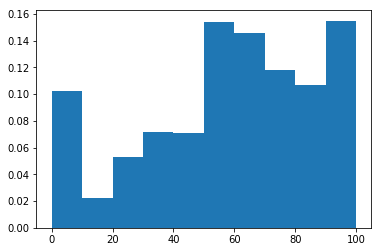

68.000000 percent with likelihood over 50
26.000000 percent with likelihood over 80
14.000000 percent with likelihood under 20


In [228]:
# distribution of mastery  
stuck_with_problems = stuck[stuck['total_problems']>0]
perc_never_stuck =(stuck_with_problems['never_stuck_problems']*100)/stuck_with_problems['total_problems']

plot_histogram(perc_never_stuck, 'Distribution of % problems mastered immediately')

Histogram of Perc Unstuck Problems Out of Total Stuck:
Distribution % who unstuck from stuck problems


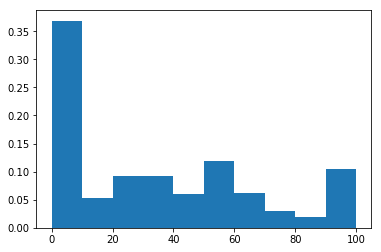

33.000000 percent with likelihood over 50
12.000000 percent with likelihood over 80
44.000000 percent with likelihood under 20


In [229]:
plt.close()
print('Histogram of Perc Unstuck Problems Out of Total Stuck:')
unstuck_with_problems = stuck.loc[(stuck['never_unstuck_problems']>0) |
                           (stuck['unstuck_problems']>0),:]
perc_unstuck = unstuck_with_problems['perc_unstuck']*100
plot_histogram(perc_unstuck, 'Distribution % who unstuck from stuck problems')

Distribution % who unstuck out of total attempted to unstuck


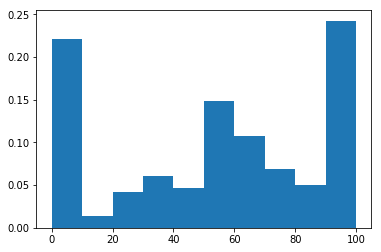

62.000000 percent with likelihood over 50
29.000000 percent with likelihood over 80
24.000000 percent with likelihood under 20


In [230]:
plt.close()
unstuck_with_problems = stuck[(stuck['reattempted_stuck_problems']>0)]
perc_reattempted_unstuck = unstuck_with_problems['unstuck_problems']*100/(unstuck_with_problems['reattempted_stuck_problems'] )
plot_histogram(perc_reattempted_unstuck, 'Distribution % who unstuck out of total attempted to unstuck')


Distribution problems worked on to unstuck


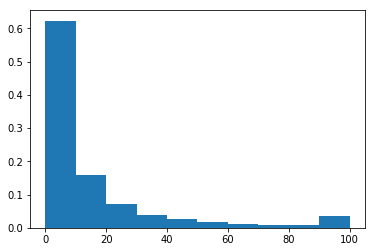

8.000000 percent with likelihood over 50
4.000000 percent with likelihood over 80
79.000000 percent with likelihood under 20


In [231]:
plt.close()
unstuck_problems = stuck[(stuck['unstuck_problems']>0)]
num_unstuck_problems = unstuck_problems['unstuck_remediation_problems']/unstuck_problems['unstuck_problems']
num_unstuck_problems[num_unstuck_problems>100]= 100
# cap to 100
plot_histogram(num_unstuck_problems, 'Distribution problems worked on to unstuck')



    sha_id  total_problems  never_stuck_problems  never_unstuck_problems  \
28     100             100                   100                     100   
29     100             100                   100                     100   
40     100             100                   100                     100   
112    100             100                   100                     100   
126    100             100                   100                     100   

     unstuck_problems  reattempted_stuck_problems  unstuck_different_exercise  \
28                100                         100                         100   
29                100                         100                         100   
40                100                         100                         100   
112               100                         100                         100   
126               100                         100                         100   

     unstuck_remediation_problems  unstuck_correct_remdi

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


10000.0

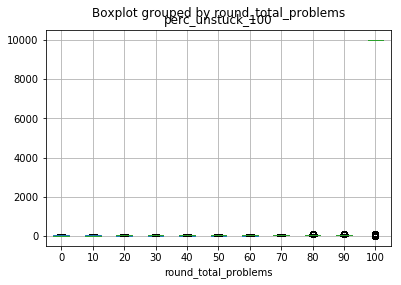

In [266]:

# Are learners who work on more problems just more likely to unstuck themselves? 
plt.close()
# how does average number of problems  impact unstuck level 
print('Average # of problems worked on by % unstuck')
# modify the new version without impact the original dataset 
perc_unstuck_by_problems = stuck[stuck['total_problems']>0,:].copy()
perc_unstuck_by_problems['cap_total_problems'] = 
perc_unstuck_by_problems['perc_unstuck_100'] = perc_unstuck_by_problems['perc_unstuck'] *100
perc_unstuck_by_problems.boxplot(column = ['perc_unstuck_100'], by = 'round_total_problems' )
np.nanmax(perc_unstuck_by_problems['perc_unstuck_100'])
# perc_unstuck_by_problems = perc_unstuck_by_problems.loc[:,('round_perc_unstuck','total_problems')]
# plt.plot(perc_unstuck_by_problems['round_perc_unstuck']*100
#     , perc_unstuck_by_problems['total_problems'], color = 'black')
# plt.show()
